In [15]:
import random
# Simulate two dice being rolled and their resulting rolls being summed
def DICE():
    x1 = random.randint(1,6)
    x2 = random.randint(1,6)
    return x1 + x2

(array([ 2780.,  5625.,  8393., 11162., 13871., 16692., 13722., 10941.,
         8296.,  5740.,  2778.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

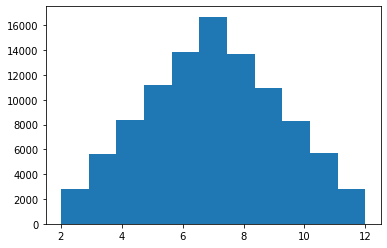

In [16]:
# Testing random distribution
x=[]
for i in range(100000):
    x.append(DICE())
    
import matplotlib.pyplot as plt
plt.hist(x, bins=11)

# Main class
## To do:
## Timing and calendar
## delay(), service() and removing customers from queue

In [1]:
import numpy as np

# Class specifics:
# - time is measured in minutes
# - customers refer to callers

# Random variables:
#1. Time between arrivals of calls at the center = (DICE * 0.333) minutes.
#2. The delay at the IVR unit = (DICE * 0.3) minutes.
#3. The delay for car-stereo call processing = (DICE * 2) minutes.
#4. The delay for other-product call processing= (DICE) minutes. 

class callCenter():# a call center simulation class
    #set random seed
    np.random.seed(0)
    def __init__(self):
        self.maximum_slots = 5 # maximum queue length for call arrivals to splitter
        self.arrival_queue = [] #a queue before others have decided to go to car or other.
        self.car_stereo_representative_queue = []
        self.others_representative_queue = []
        self.server_state = 0 #0 = idle, 1 = busy
        self.current_time = 0
        # print("Call Center Simulation")
        
    # Input: customer - a random number generated representing if a customer is calling for car stereo or others
    # Assumption: Because the run function already handles the arrival queue busy signaling, we do not need to here
    def arrival (self,customer):
        # 11am to 4pm - 5 hours of peak time
        if self.current_time > 300: #if time is greater than 5*60 = 300 minutes, then call center is closed
            print("Call Center Closed")
            return
        
        print("Arrival")
        
        # Delay at IVR unit
        delay(DICE() * 0.3)
        
        if customer <= 4: #if random DICE number is <= 4, then add to car-stereo queue
            if len(self.car_stereo_representative_queue) > self.maximum_slots: #if there are no available spots for car stereo
                if self.arrival_queue > self.maximum_slots:
                    print("No available slots")
                    return
                self.arrival_queue.append(customer)
                
                # Delay for car-stereo call processing
                delay(DICE() * 2)
                
            #there are availble spots for car stereo
            print("Add to Car Stereo Queue")
            self.car_stereo_representative_queue.append(customer)
        #if random number is greater than 4, then add to others queue
        else:
            if len(self.others_representative_queue) > self.maximum_slots: #if there are no available spots for others
                if self.arrival_queue > self.maximum_slots:
                    print("No available slots")
                    return 
                self.arrival_queue.append(customer)
                
                # Delay for other-product call processing
                delay(DICE())
            print("Add to Others Queue")
            self.others_representative_queue.append(customer)

    def available_signal_checking(self, queue):
        if len(queue) > self.maximum_slots:
            return 0 #0 = no signal
        else:
            return 1 #1 = signal
    
    def run(self,customer):
        self.server_state = 1
        while self.server_state == 1:
            # self.current_time += 1
            # print("Time: ", self.time)

            if self.available_signal_checking(self.arrival_queue):
                self.arrival(customer)
            # print(self.car_stereo_representative_queue)
            self.service()
            # self.departure()
            # print("Car Stereo Queue: ", self.car_stereo_representative_queue)
            # print("Others Queue: ", self.others_representative_queue)
            # print("Server State: ", self.server_state)
            # print("Time: ", self.time)
    

In [3]:
#implement the simulation clock and the advance of the simulation clock, as well as an event calendar (event list) which is a list of events as they are scheduled. In every simulation, there is only one calendar and it is ordered by the earliest scheduled-time first.
#generate 100 customers
customer_list = np.random.uniform(0,1,5)
print(customer_list)
test = callCenter()
test.run(customer_list[4])

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
Arrival
Add to Car Stereo Queue


AttributeError: 'callCenter' object has no attribute 'service'